In [1]:
## Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
import scipy.stats as stats

In [2]:
## Import Ergast API csv's

circuits = pd.read_csv("Datasets/circuits.csv")
constructor_results = pd.read_csv("Datasets/constructor_results.csv")
constructor_standings = pd.read_csv("Datasets/constructor_standings.csv")
constructors = pd.read_csv("Datasets/constructors.csv")
driver_standings = pd.read_csv("Datasets/driver_standings.csv")
drivers = pd.read_csv("Datasets/drivers.csv")
lap_times = pd.read_csv("Datasets/lap_times.csv")
pit_stops = pd.read_csv("Datasets/pit_stops.csv")
qualifying = pd.read_csv("Datasets/qualifying.csv")
races = pd.read_csv("Datasets/races.csv")
results = pd.read_csv("Datasets/results.csv")
seasons = pd.read_csv("Datasets/seasons.csv")
status = pd.read_csv("Datasets/status.csv")
weather = pd.read_csv("Datasets/weather.csv")

In [3]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [4]:
## Joining datasets
driver_results = pd.merge(results,drivers, how='left',on='driverId')
driver_results_races = pd.merge(driver_results,races, how='left', on='raceId')
driver_results_races_circuits = pd.merge(driver_results_races,circuits, how='left', on='circuitId')
driver_results_races_circuits_status = pd.merge(driver_results_races_circuits,status, how='left', on='statusId')
driver_results_races_circuits_status_pitstops = pd.merge(driver_results_races_circuits_status,pit_stops, how='left', 
                                                          on=['raceId','driverId'])
pitstops_qualifying = pd.merge(driver_results_races_circuits_status_pitstops,qualifying, how='left', on=['raceId','driverId'])
pitstops_qualifying_weather = pd.merge(pitstops_qualifying,weather, how='left', on=['year','circuitRef'])
merged_F1 = pitstops_qualifying_weather

In [5]:
## Want to see all column values within this dataset

pd.set_option('display.max_columns', None)
merged_F1.head(5)

,resultId,raceId,driverId,constructorId_x,number_x,grid,position_x,positionText,positionOrder,points,laps,time_x,milliseconds_x,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverRef,number_y,code,forename,surname,dob,nationality,url_x,year,round_x,circuitId,name_x,date,time_y,url_y,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,circuitRef,name_y,location,country,lat,lng,alt,url,status,stop,lap,time,duration,milliseconds_y,qualifyId,constructorId_y,number,position_y,q1,q2,q3,round_y,weather_conditions,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Finished,NaN,NaN,NaN,NaN,NaN,1.0,1.0,22.0,1.0,1:26.572,1:25.187,1:26.714,1.0,"Clear, dry, air temperature of 39 °C (102 °F).",0.0,0.0,0.0,0.0,0.0
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Finished,NaN,NaN,NaN,NaN,NaN,5.0,2.0,3.0,5.0,1:25.960,1:25.518,1:27.236,1.0,"Clear, dry, air temperature of 39 °C (102 °F).",0.0,0.0,0.0,0.0,0.0
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Finished,NaN,NaN,NaN,NaN,NaN,7.0,3.0,7.0,7.0,1:26.295,1:26.059,1:28.687,1.0,"Clear, dry, air temperature of 39 °C (102 °F).",0.0,0.0,0.0,0.0,0.0
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Finished,NaN,NaN,NaN,NaN,NaN,12.0,4.0,5.0,12.0,1:26.907,1:26.188,\N,1.0,"Clear, dry, air temperature of 39 °C (102 °F).",0.0,0.0,0.0,0.0,0.0
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Finished,NaN,NaN,NaN,NaN,NaN,3.0,1.0,23.0,3.0,1:25.664,1:25.452,1:27.079,1.0,"Clear, dry, air temperature of 39 °C (102 °F).",0.0,0.0,0.0,0.0,0.0


In [6]:
## Display the list of columns

merged_F1.columns.values.tolist()

['resultId',
 'raceId',
 'driverId',
 'constructorId_x',
 'number_x',
 'grid',
 'position_x',
 'positionText',
 'positionOrder',
 'points',
 'laps',
 'time_x',
 'milliseconds_x',
 'fastestLap',
 'rank',
 'fastestLapTime',
 'fastestLapSpeed',
 'statusId',
 'driverRef',
 'number_y',
 'code',
 'forename',
 'surname',
 'dob',
 'nationality',
 'url_x',
 'year',
 'round_x',
 'circuitId',
 'name_x',
 'date',
 'time_y',
 'url_y',
 'fp1_date',
 'fp1_time',
 'fp2_date',
 'fp2_time',
 'fp3_date',
 'fp3_time',
 'quali_date',
 'quali_time',
 'sprint_date',
 'sprint_time',
 'circuitRef',
 'name_y',
 'location',
 'country',
 'lat',
 'lng',
 'alt',
 'url',
 'status',
 'stop',
 'lap',
 'time',
 'duration',
 'milliseconds_y',
 'qualifyId',
 'constructorId_y',
 'number',
 'position_y',
 'q1',
 'q2',
 'q3',
 'round_y',
 'weather_conditions',
 'weather_warm',
 'weather_cold',
 'weather_dry',
 'weather_wet',
 'weather_cloudy']

In [7]:
driver_df = merged_F1.drop(['number_x','positionText','positionOrder','time_x','fastestLap','rank','driverRef','number_y',
                            'code','url_x','round_x','date','time_y','url_y','fp1_date','fp1_time','fp2_date','fp2_time',
                            'fp3_date','fp3_time','quali_date','quali_time','sprint_date','sprint_time','circuitRef','name_y',
                            'location','lat','lng','alt','url','status','stop','lap','time','duration','qualifyId',
                            'constructorId_y','number','position_y','round_y','weather_conditions'], axis = 1)

In [8]:
driver_df.dtypes

resultId             int64
raceId               int64
driverId             int64
constructorId_x      int64
grid                 int64
position_x          object
points             float64
laps                 int64
milliseconds_x      object
fastestLapTime      object
fastestLapSpeed     object
statusId             int64
forename            object
surname             object
dob                 object
nationality         object
year                 int64
circuitId            int64
name_x              object
country             object
milliseconds_y     float64
q1                  object
q2                  object
q3                  object
weather_warm       float64
weather_cold       float64
weather_dry        float64
weather_wet        float64
weather_cloudy     float64
dtype: object

In [9]:
driver_df.rename(columns={'constructorId_x':'constructorId','grid':'starting_position','position_x':'finishing_position',
                          'milliseconds_x':'race_time_milliseconds','nationality':'driver_nationality','name_x':'GP_name',
                          'milliseconds_y':'pitstop_milliseconds','q1':'Q1_time','q2':'Q2_time','q3':'Q3_time'}, inplace=True)

In [10]:
## Creating a winner column feature from the finishing position data

driver_df['finishing_position'] = driver_df['finishing_position'].replace({'\\N':0})
driver_df['finishing_position'] = pd.to_numeric(driver_df['finishing_position'])   ## convert \N values to numeric 0

driver_df["finishing_position"] = [int(i) for i in driver_df["finishing_position"]]
driver_df["winner"] = np.where(driver_df["finishing_position"]==1,1,0)  ## Using i loop to create winner column
driver_df

,resultId,raceId,driverId,constructorId,starting_position,finishing_position,points,laps,race_time_milliseconds,fastestLapTime,fastestLapSpeed,statusId,forename,surname,dob,driver_nationality,year,circuitId,GP_name,country,pitstop_milliseconds,Q1_time,Q2_time,Q3_time,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,winner
0,1,18,1,1,1,1,10.0,58,5690616,1:27.452,218.300,1,Lewis,Hamilton,1985-01-07,British,2008,1,Australian Grand Prix,Australia,NaN,1:26.572,1:25.187,1:26.714,0.0,0.0,0.0,0.0,0.0,1
1,2,18,2,2,5,2,8.0,58,5696094,1:27.739,217.586,1,Nick,Heidfeld,1977-05-10,German,2008,1,Australian Grand Prix,Australia,NaN,1:25.960,1:25.518,1:27.236,0.0,0.0,0.0,0.0,0.0,0
2,3,18,3,3,7,3,6.0,58,5698779,1:28.090,216.719,1,Nico,Rosberg,1985-06-27,German,2008,1,Australian Grand Prix,Australia,NaN,1:26.295,1:26.059,1:28.687,0.0,0.0,0.0,0.0,0.0,0
3,4,18,4,4,11,4,5.0,58,5707797,1:28.603,215.464,1,Fernando,Alonso,1981-07-29,Spanish,2008,1,Australian Grand Prix,Australia,NaN,1:26.907,1:26.188,\N,0.0,0.0,0.0,0.0,0.0,0
4,5,18,5,1,3,5,4.0,58,5708630,1:27.418,218.385,1,Heikki,Kovalainen,1981-10-19,Finnish,2008,1,Australian Grand Prix,Australia,NaN,1:25.664,1:25.452,1:27.079,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31478,26062,1109,825,210,19,17,0.0,69,\N,1:23.864,188.061,11,Kevin,Magnussen,1992-10-05,Danish,2023,11,Hungarian Grand Prix,Hungary,22152.0,1:19.206,\N,\N,NaN,NaN,NaN,NaN,NaN,0
31479,26063,1109,858,3,20,0,0.0,67,\N,1:23.496,188.890,31,Logan,Sargeant,2000-12-31,American,2023,11,Hungarian Grand Prix,Hungary,24001.0,1:19.248,\N,\N,NaN,NaN,NaN,NaN,NaN,0
31480,26063,1109,858,3,20,0,0.0,67,\N,1:23.496,188.890,31,Logan,Sargeant,2000-12-31,American,2023,11,Hungarian Grand Prix,Hungary,22197.0,1:19.248,\N,\N,NaN,NaN,NaN,NaN,NaN,0
31481,26064,1109,839,214,12,0,0.0,2,\N,\N,\N,130,Esteban,Ocon,1996-09-17,French,2023,11,Hungarian Grand Prix,Hungary,NaN,1:18.854,1:17.841,\N,NaN,NaN,NaN,NaN,NaN,0


In [11]:
## Creating a podium column using the first, second and third from each race

driver_race_data = driver_df

podium = []
for i in driver_race_data["finishing_position"]:
    if (i==1)|(i==2)|(i==3):
        podium.append(1)
    else:
        podium.append(0)
        
driver_race_data["podium"] = podium
driver_race_data

,resultId,raceId,driverId,constructorId,starting_position,finishing_position,points,laps,race_time_milliseconds,fastestLapTime,fastestLapSpeed,statusId,forename,surname,dob,driver_nationality,year,circuitId,GP_name,country,pitstop_milliseconds,Q1_time,Q2_time,Q3_time,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,winner,podium
0,1,18,1,1,1,1,10.0,58,5690616,1:27.452,218.300,1,Lewis,Hamilton,1985-01-07,British,2008,1,Australian Grand Prix,Australia,NaN,1:26.572,1:25.187,1:26.714,0.0,0.0,0.0,0.0,0.0,1,1
1,2,18,2,2,5,2,8.0,58,5696094,1:27.739,217.586,1,Nick,Heidfeld,1977-05-10,German,2008,1,Australian Grand Prix,Australia,NaN,1:25.960,1:25.518,1:27.236,0.0,0.0,0.0,0.0,0.0,0,1
2,3,18,3,3,7,3,6.0,58,5698779,1:28.090,216.719,1,Nico,Rosberg,1985-06-27,German,2008,1,Australian Grand Prix,Australia,NaN,1:26.295,1:26.059,1:28.687,0.0,0.0,0.0,0.0,0.0,0,1
3,4,18,4,4,11,4,5.0,58,5707797,1:28.603,215.464,1,Fernando,Alonso,1981-07-29,Spanish,2008,1,Australian Grand Prix,Australia,NaN,1:26.907,1:26.188,\N,0.0,0.0,0.0,0.0,0.0,0,0
4,5,18,5,1,3,5,4.0,58,5708630,1:27.418,218.385,1,Heikki,Kovalainen,1981-10-19,Finnish,2008,1,Australian Grand Prix,Australia,NaN,1:25.664,1:25.452,1:27.079,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31478,26062,1109,825,210,19,17,0.0,69,\N,1:23.864,188.061,11,Kevin,Magnussen,1992-10-05,Danish,2023,11,Hungarian Grand Prix,Hungary,22152.0,1:19.206,\N,\N,NaN,NaN,NaN,NaN,NaN,0,0
31479,26063,1109,858,3,20,0,0.0,67,\N,1:23.496,188.890,31,Logan,Sargeant,2000-12-31,American,2023,11,Hungarian Grand Prix,Hungary,24001.0,1:19.248,\N,\N,NaN,NaN,NaN,NaN,NaN,0,0
31480,26063,1109,858,3,20,0,0.0,67,\N,1:23.496,188.890,31,Logan,Sargeant,2000-12-31,American,2023,11,Hungarian Grand Prix,Hungary,22197.0,1:19.248,\N,\N,NaN,NaN,NaN,NaN,NaN,0,0
31481,26064,1109,839,214,12,0,0.0,2,\N,\N,\N,130,Esteban,Ocon,1996-09-17,French,2023,11,Hungarian Grand Prix,Hungary,NaN,1:18.854,1:17.841,\N,NaN,NaN,NaN,NaN,NaN,0,0


In [14]:
## Removing NaN values from both millisecond columns and converting data type

driver_race_data['race_time_milliseconds'] = driver_race_data['race_time_milliseconds'].replace({'\\N':0})
driver_race_data['race_time_milliseconds'] = pd.to_numeric(driver_race_data['race_time_milliseconds'])

driver_race_data['pitstop_milliseconds'] = driver_race_data['pitstop_milliseconds'].fillna(0)
driver_race_data['pitstop_milliseconds'] = pd.to_numeric(driver_race_data['pitstop_milliseconds'])

driver_race_data['fastestLapTime'] = driver_race_data['fastestLapTime'].replace({'\\N':0})
driver_race_data['Q1_time'] = driver_race_data['Q1_time'].replace({'\\N':0})
driver_race_data['Q1_time'] = driver_race_data['Q1_time'].fillna(0)
driver_race_data['Q2_time'] = driver_race_data['Q2_time'].replace({'\\N':0})
driver_race_data['Q2_time'] = driver_race_data['Q2_time'].fillna(0)
driver_race_data['Q3_time'] = driver_race_data['Q3_time'].replace({'\\N':0})
driver_race_data['Q3_time'] = driver_race_data['Q3_time'].fillna(0)

In [16]:
## Need to convert the FastestLapTime, Q1, Q2 & Q3 columns to milliseconds
## If else statement checks for timestamp and integer values
## Returns none if value can not be converted

def convert_to_milliseconds(value):
    if isinstance(value, int):
        return value  
    try:
        components = value.split(':')
        minutes = float(components[0])
        seconds = float(components[1])
        if len(components) > 2:
            milliseconds = float(components[2])
        else:
            milliseconds = 0.0
        total_milliseconds = (minutes * 60 * 1000) + (seconds * 1000) + milliseconds
        return int(total_milliseconds)
    except (AttributeError, ValueError):
        return None  

columns_to_convert = ['fastestLapTime', 'Q1_time', 'Q2_time', 'Q3_time']

for column in columns_to_convert:
    driver_race_data[column] = driver_race_data[column].apply(convert_to_milliseconds)

print(driver_race_data)

       resultId  raceId  driverId  constructorId  starting_position  \
0             1      18         1              1                  1   
1             2      18         2              2                  5   
2             3      18         3              3                  7   
3             4      18         4              4                 11   
4             5      18         5              1                  3   
...         ...     ...       ...            ...                ...   
31478     26062    1109       825            210                 19   
31479     26063    1109       858              3                 20   
31480     26063    1109       858              3                 20   
31481     26064    1109       839            214                 12   
31482     26065    1109       842            214                 15   

       finishing_position  points  laps  race_time_milliseconds  \
0                       1    10.0    58                 5690616   
1            

In [17]:
driver_race_data

,resultId,raceId,driverId,constructorId,starting_position,finishing_position,points,laps,race_time_milliseconds,fastestLapTime,fastestLapSpeed,statusId,forename,surname,dob,driver_nationality,year,circuitId,GP_name,country,pitstop_milliseconds,Q1_time,Q2_time,Q3_time,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,winner,podium
0,1,18,1,1,1,1,10.0,58,5690616,87452,218.300,1,Lewis,Hamilton,1985-01-07,British,2008,1,Australian Grand Prix,Australia,0.0,86572,85187,86714,0.0,0.0,0.0,0.0,0.0,1,1
1,2,18,2,2,5,2,8.0,58,5696094,87739,217.586,1,Nick,Heidfeld,1977-05-10,German,2008,1,Australian Grand Prix,Australia,0.0,85960,85518,87236,0.0,0.0,0.0,0.0,0.0,0,1
2,3,18,3,3,7,3,6.0,58,5698779,88090,216.719,1,Nico,Rosberg,1985-06-27,German,2008,1,Australian Grand Prix,Australia,0.0,86295,86059,88687,0.0,0.0,0.0,0.0,0.0,0,1
3,4,18,4,4,11,4,5.0,58,5707797,88603,215.464,1,Fernando,Alonso,1981-07-29,Spanish,2008,1,Australian Grand Prix,Australia,0.0,86907,86188,0,0.0,0.0,0.0,0.0,0.0,0,0
4,5,18,5,1,3,5,4.0,58,5708630,87418,218.385,1,Heikki,Kovalainen,1981-10-19,Finnish,2008,1,Australian Grand Prix,Australia,0.0,85664,85452,87079,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31478,26062,1109,825,210,19,17,0.0,69,0,83864,188.061,11,Kevin,Magnussen,1992-10-05,Danish,2023,11,Hungarian Grand Prix,Hungary,22152.0,79206,0,0,NaN,NaN,NaN,NaN,NaN,0,0
31479,26063,1109,858,3,20,0,0.0,67,0,83496,188.890,31,Logan,Sargeant,2000-12-31,American,2023,11,Hungarian Grand Prix,Hungary,24001.0,79248,0,0,NaN,NaN,NaN,NaN,NaN,0,0
31480,26063,1109,858,3,20,0,0.0,67,0,83496,188.890,31,Logan,Sargeant,2000-12-31,American,2023,11,Hungarian Grand Prix,Hungary,22197.0,79248,0,0,NaN,NaN,NaN,NaN,NaN,0,0
31481,26064,1109,839,214,12,0,0.0,2,0,0,\N,130,Esteban,Ocon,1996-09-17,French,2023,11,Hungarian Grand Prix,Hungary,0.0,78854,77841,0,NaN,NaN,NaN,NaN,NaN,0,0


In [19]:
## Addressing the remaining columns with NaN or \N values

driver_race_data['fastestLapSpeed'] = driver_race_data['fastestLapSpeed'].replace({'\\N':0})
driver_race_data['fastestLapSpeed'] = driver_race_data['fastestLapSpeed'].fillna(0)

driver_race_data['weather_warm'] = driver_race_data['weather_warm'].fillna(0)
driver_race_data['weather_cold'] = driver_race_data['weather_cold'].fillna(0)
driver_race_data['weather_dry'] = driver_race_data['weather_dry'].fillna(0)
driver_race_data['weather_wet'] = driver_race_data['weather_wet'].fillna(0)
driver_race_data['weather_cloudy'] = driver_race_data['weather_cloudy'].fillna(0)
driver_race_data

,resultId,raceId,driverId,constructorId,starting_position,finishing_position,points,laps,race_time_milliseconds,fastestLapTime,fastestLapSpeed,statusId,forename,surname,dob,driver_nationality,year,circuitId,GP_name,country,pitstop_milliseconds,Q1_time,Q2_time,Q3_time,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,winner,podium
0,1,18,1,1,1,1,10.0,58,5690616,87452,218.300,1,Lewis,Hamilton,1985-01-07,British,2008,1,Australian Grand Prix,Australia,0.0,86572,85187,86714,0.0,0.0,0.0,0.0,0.0,1,1
1,2,18,2,2,5,2,8.0,58,5696094,87739,217.586,1,Nick,Heidfeld,1977-05-10,German,2008,1,Australian Grand Prix,Australia,0.0,85960,85518,87236,0.0,0.0,0.0,0.0,0.0,0,1
2,3,18,3,3,7,3,6.0,58,5698779,88090,216.719,1,Nico,Rosberg,1985-06-27,German,2008,1,Australian Grand Prix,Australia,0.0,86295,86059,88687,0.0,0.0,0.0,0.0,0.0,0,1
3,4,18,4,4,11,4,5.0,58,5707797,88603,215.464,1,Fernando,Alonso,1981-07-29,Spanish,2008,1,Australian Grand Prix,Australia,0.0,86907,86188,0,0.0,0.0,0.0,0.0,0.0,0,0
4,5,18,5,1,3,5,4.0,58,5708630,87418,218.385,1,Heikki,Kovalainen,1981-10-19,Finnish,2008,1,Australian Grand Prix,Australia,0.0,85664,85452,87079,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31478,26062,1109,825,210,19,17,0.0,69,0,83864,188.061,11,Kevin,Magnussen,1992-10-05,Danish,2023,11,Hungarian Grand Prix,Hungary,22152.0,79206,0,0,0.0,0.0,0.0,0.0,0.0,0,0
31479,26063,1109,858,3,20,0,0.0,67,0,83496,188.890,31,Logan,Sargeant,2000-12-31,American,2023,11,Hungarian Grand Prix,Hungary,24001.0,79248,0,0,0.0,0.0,0.0,0.0,0.0,0,0
31480,26063,1109,858,3,20,0,0.0,67,0,83496,188.890,31,Logan,Sargeant,2000-12-31,American,2023,11,Hungarian Grand Prix,Hungary,22197.0,79248,0,0,0.0,0.0,0.0,0.0,0.0,0,0
31481,26064,1109,839,214,12,0,0.0,2,0,0,0,130,Esteban,Ocon,1996-09-17,French,2023,11,Hungarian Grand Prix,Hungary,0.0,78854,77841,0,0.0,0.0,0.0,0.0,0.0,0,0


In [20]:
driver_race_team = pd.merge(driver_race_data,constructors, how='left', on='constructorId')

In [21]:
driver_race_team.head(10)

,resultId,raceId,driverId,constructorId,starting_position,finishing_position,points,laps,race_time_milliseconds,fastestLapTime,fastestLapSpeed,statusId,forename,surname,dob,driver_nationality,year,circuitId,GP_name,country,pitstop_milliseconds,Q1_time,Q2_time,Q3_time,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,winner,podium,constructorRef,name,nationality,url
0,1,18,1,1,1,1,10.0,58,5690616,87452,218.300,1,Lewis,Hamilton,1985-01-07,British,2008,1,Australian Grand Prix,Australia,0.0,86572,85187,86714,0.0,0.0,0.0,0.0,0.0,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,18,2,2,5,2,8.0,58,5696094,87739,217.586,1,Nick,Heidfeld,1977-05-10,German,2008,1,Australian Grand Prix,Australia,0.0,85960,85518,87236,0.0,0.0,0.0,0.0,0.0,0,1,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,18,3,3,7,3,6.0,58,5698779,88090,216.719,1,Nico,Rosberg,1985-06-27,German,2008,1,Australian Grand Prix,Australia,0.0,86295,86059,88687,0.0,0.0,0.0,0.0,0.0,0,1,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,18,4,4,11,4,5.0,58,5707797,88603,215.464,1,Fernando,Alonso,1981-07-29,Spanish,2008,1,Australian Grand Prix,Australia,0.0,86907,86188,0,0.0,0.0,0.0,0.0,0.0,0,0,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,18,5,1,3,5,4.0,58,5708630,87418,218.385,1,Heikki,Kovalainen,1981-10-19,Finnish,2008,1,Australian Grand Prix,Australia,0.0,85664,85452,87079,0.0,0.0,0.0,0.0,0.0,0,0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
5,6,18,6,3,13,6,3.0,57,0,89639,212.974,11,Kazuki,Nakajima,1985-01-11,Japanese,2008,1,Australian Grand Prix,Australia,0.0,86891,86413,0,0.0,0.0,0.0,0.0,0.0,0,0,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
6,7,18,7,5,17,7,2.0,55,0,89534,213.224,5,Sébastien,Bourdais,1979-02-28,French,2008,1,Australian Grand Prix,Australia,0.0,87446,0,0,0.0,0.0,0.0,0.0,0.0,0,0,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
7,8,18,8,6,15,8,1.0,53,0,87903,217.180,5,Kimi,Räikkönen,1979-10-17,Finnish,2008,1,Australian Grand Prix,Australia,0.0,86140,0,0,0.0,0.0,0.0,0.0,0.0,0,0,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari
8,9,18,9,2,2,0,0.0,47,0,88753,215.100,4,Robert,Kubica,1984-12-07,Polish,2008,1,Australian Grand Prix,Australia,0.0,86103,85315,86869,0.0,0.0,0.0,0.0,0.0,0,0,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
9,10,18,10,7,18,0,0.0,43,0,89558,213.166,3,Timo,Glock,1982-03-18,German,2008,1,Australian Grand Prix,Australia,0.0,86919,86164,89593,0.0,0.0,0.0,0.0,0.0,0,0,toyota,Toyota,Japanese,http://en.wikipedia.org/wiki/Toyota_Racing


In [22]:
driver_race_data = driver_race_team.drop(['constructorRef','nationality','url'], axis=1)

In [23]:
## Must update team names to most recent changes

driver_race_data['name'] = driver_race_data['name'].apply(lambda x: 'Aston Martin' if x=='Racing Point' else x)
driver_race_data['name'] = driver_race_data['name'].apply(lambda x: 'Aston Martin' if x=='Force India' else x)
driver_race_data['name'] = driver_race_data['name'].apply(lambda x: 'Alfa Romeo' if x=='Sauber' else x)
driver_race_data['name'] = driver_race_data['name'].apply(lambda x: 'Alpine' if x=='Lotus F1' else x)
driver_race_data['name'] = driver_race_data['name'].apply(lambda x: 'Alpine' if x=='Renault' else x)
driver_race_data['name'] = driver_race_data['name'].apply(lambda x: 'AlphaTauri' if x=='Renault' else x)

In [24]:
driver_race_data.shape

(31483, 32)

In [26]:
driver_race_data.columns.values.tolist()

['resultId',
 'raceId',
 'driverId',
 'constructorId',
 'starting_position',
 'finishing_position',
 'points',
 'laps',
 'race_time_milliseconds',
 'fastestLapTime',
 'fastestLapSpeed',
 'statusId',
 'forename',
 'surname',
 'dob',
 'driver_nationality',
 'year',
 'circuitId',
 'GP_name',
 'country',
 'pitstop_milliseconds',
 'Q1_time',
 'Q2_time',
 'Q3_time',
 'weather_warm',
 'weather_cold',
 'weather_dry',
 'weather_wet',
 'weather_cloudy',
 'winner',
 'podium',
 'name',
 'driver']

In [25]:
driver_race_data['driver'] = driver_race_data['forename']+' '+driver_race_data['surname']
driver_race_data['dob'] = pd.to_datetime(driver_race_data['dob'],format='%Y-%m-%d').dt.strftime('%d/%m/%Y')

driver_race_data.drop(['forename','surname'], axis=1)

,resultId,raceId,driverId,constructorId,starting_position,finishing_position,points,laps,race_time_milliseconds,fastestLapTime,fastestLapSpeed,statusId,dob,driver_nationality,year,circuitId,GP_name,country,pitstop_milliseconds,Q1_time,Q2_time,Q3_time,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,winner,podium,name,driver
0,1,18,1,1,1,1,10.0,58,5690616,87452,218.300,1,07/01/1985,British,2008,1,Australian Grand Prix,Australia,0.0,86572,85187,86714,0.0,0.0,0.0,0.0,0.0,1,1,McLaren,Lewis Hamilton
1,2,18,2,2,5,2,8.0,58,5696094,87739,217.586,1,10/05/1977,German,2008,1,Australian Grand Prix,Australia,0.0,85960,85518,87236,0.0,0.0,0.0,0.0,0.0,0,1,BMW Sauber,Nick Heidfeld
2,3,18,3,3,7,3,6.0,58,5698779,88090,216.719,1,27/06/1985,German,2008,1,Australian Grand Prix,Australia,0.0,86295,86059,88687,0.0,0.0,0.0,0.0,0.0,0,1,Williams,Nico Rosberg
3,4,18,4,4,11,4,5.0,58,5707797,88603,215.464,1,29/07/1981,Spanish,2008,1,Australian Grand Prix,Australia,0.0,86907,86188,0,0.0,0.0,0.0,0.0,0.0,0,0,Alpine,Fernando Alonso
4,5,18,5,1,3,5,4.0,58,5708630,87418,218.385,1,19/10/1981,Finnish,2008,1,Australian Grand Prix,Australia,0.0,85664,85452,87079,0.0,0.0,0.0,0.0,0.0,0,0,McLaren,Heikki Kovalainen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31478,26062,1109,825,210,19,17,0.0,69,0,83864,188.061,11,05/10/1992,Danish,2023,11,Hungarian Grand Prix,Hungary,22152.0,79206,0,0,0.0,0.0,0.0,0.0,0.0,0,0,Haas F1 Team,Kevin Magnussen
31479,26063,1109,858,3,20,0,0.0,67,0,83496,188.890,31,31/12/2000,American,2023,11,Hungarian Grand Prix,Hungary,24001.0,79248,0,0,0.0,0.0,0.0,0.0,0.0,0,0,Williams,Logan Sargeant
31480,26063,1109,858,3,20,0,0.0,67,0,83496,188.890,31,31/12/2000,American,2023,11,Hungarian Grand Prix,Hungary,22197.0,79248,0,0,0.0,0.0,0.0,0.0,0.0,0,0,Williams,Logan Sargeant
31481,26064,1109,839,214,12,0,0.0,2,0,0,0,130,17/09/1996,French,2023,11,Hungarian Grand Prix,Hungary,0.0,78854,77841,0,0.0,0.0,0.0,0.0,0.0,0,0,Alpine F1 Team,Esteban Ocon


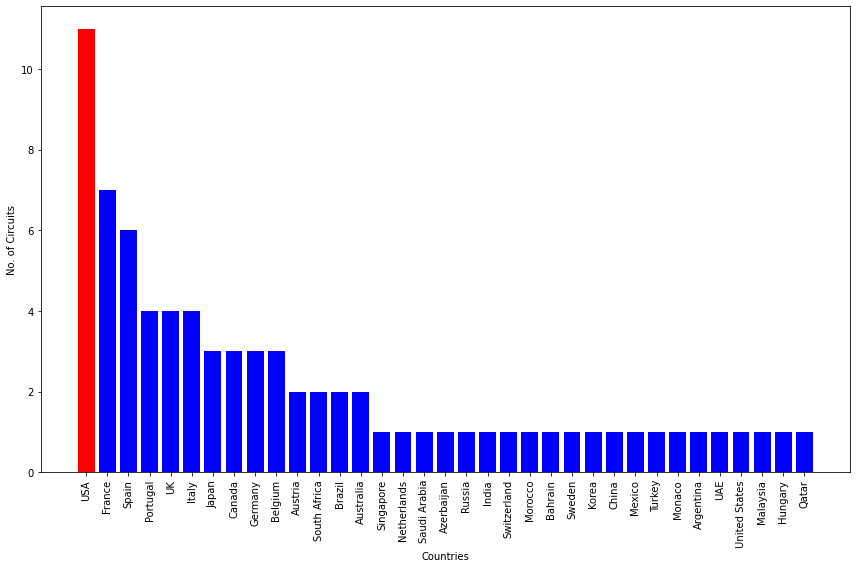

In [33]:
## Plot the number of circuits per country

fig, ax = plt.subplots(figsize=(12,8))

most_frequent_country = circuits['country'].value_counts().idxmax()

country_counts = circuits['country'].value_counts()
plt.bar(country_counts.index, country_counts.values, color='blue')

## Highlighting the most frequent country in the graph red
plt.bar(most_frequent_country, country_counts[most_frequent_country], 
        color='red')

plt.xlabel('Countries')
plt.ylabel('No. of Circuits')
plt.savefig('Circuits per country.png', dpi=300)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

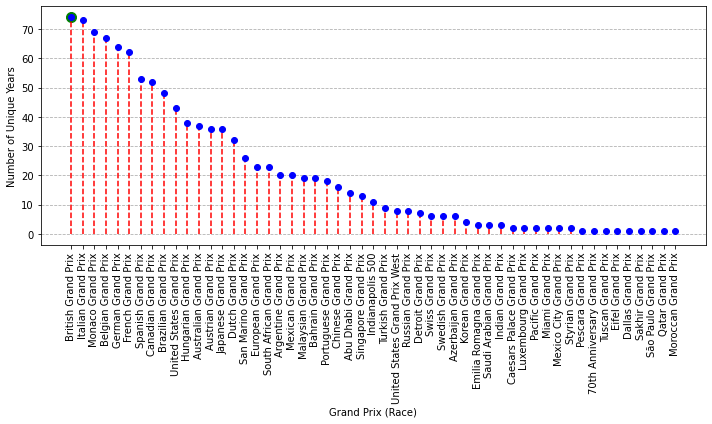

In [43]:
## Plotting a lollipop chart to represent the Grand Prix circuit with the most races held

## Must ensure no duplicate results are included for each driver competing
unique_races = driver_race_data.drop_duplicates(subset=['GP_name', 'year'])
race_counts = unique_races['GP_name'].value_counts()

race_counts = race_counts.sort_values(ascending=False)


winning_circuit = race_counts.index[0]

# Create a lollipop chart
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.stem(race_counts.index, race_counts.values, basefmt=' ', markerfmt='bo', 
         linefmt='r--', use_line_collection=True)

# Highlight the highest value with a red marker
plt.scatter(winning_circuit, race_counts[winning_circuit], color='green', 
            marker='o', s=100)

plt.xlabel('Grand Prix (Race)')
plt.ylabel('Number of Unique Years')
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Number of races held per Grand Prix - Lollipop Chart.png', dpi=300)
plt.show()

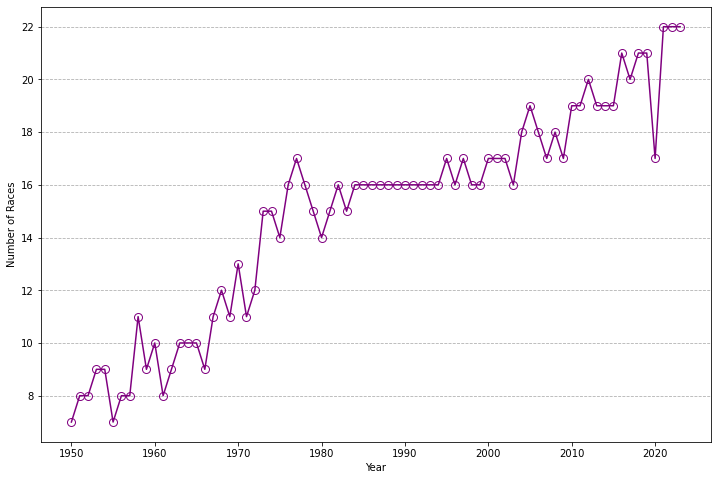

In [45]:
## Getting the number of races per year now with an empty markers line plot

races_per_year = races.groupby('year')['round'].nunique()

plt.figure(figsize=(12, 8))
plt.plot(races_per_year.index, races_per_year.values, marker='o', linestyle='-',
         markersize=8, markerfacecolor='none', color='purple')

plt.xlabel('Year')
plt.ylabel('Number of Races')
plt.grid(axis='y', linestyle='--')
plt.savefig('Number of races per year.png', dpi=300)
plt.show()

In [51]:
# Creating race wins graph for last 20 years
race_wins = driver_race_data.loc[(driver_race_data['year']>=2002) & (driver_race_data['year']<2023) & (driver_race_data['finishing_position']!=0)]
race_wins_total = race_wins.groupby(['driver'])['finishing_position'].count().sort_values(ascending=False)

driver_wins = driver_race_data.loc[(driver_race_data['year']>=2002) & (driver_race_data['year']<2023) & (driver_race_data['finishing_position']==1)]
driver_wins_total = driver_wins.groupby(['driver'])['finishing_position'].count().sort_values(ascending=False)

perc_wins = pd.merge(race_wins_total,driver_wins_total, how='left', on='driver')
perc_wins = perc_wins.rename(columns={'finishing_position_x':'races','finishing_position_y':'wins'})
perc_wins['win_percent'] = ((perc_wins['wins'] / perc_wins['races']) * 100)
perc_wins = perc_wins[:15]      ## Only want to display the top 15 results
perc_wins = perc_wins.sort_values(ascending=False, by='win_percent')

## Converting index to list 
x_axis = perc_wins.index.tolist()
y_axis = perc_wins.groupby(['driver'], sort=False)['win_percent'].sum().sort_values(ascending=False)

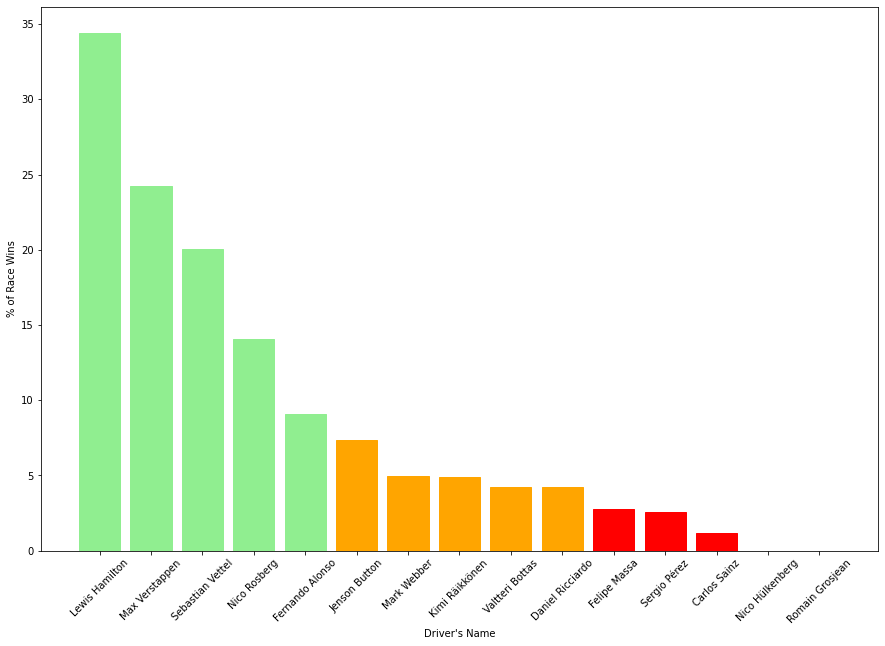

In [55]:
colors = ['lightgreen', 'orange', 'red']

plt.figure(figsize=(15,10))
top15 = plt.bar(x_axis, y_axis, color=colors[0])
color_index = 0    ## Starting with lightgreen

for i, bar in enumerate(top15):
    if i > 0 and i % 5 == 0:
        color_index += 1    ## Change color every 5 results
    bar.set_color(colors[color_index])

plt.xlabel("Driver's Name")
plt.ylabel("% of Race Wins")
plt.xticks(rotation=45);
plt.savefig('Percentage of Wins per Driver 2002-2022.png', dpi=300)

In [56]:
## Getting the driver age data based on DOB & Race date columns
driver_race_data[['dob','date']] = driver_race_data[['dob','date']].apply(pd.to_datetime)
driver_race_data['driver_age'] = (driver_race_data['date'] - driver_race_data['dob']) / np.timedelta64(1, 'Y')

KeyError: "['date'] not in index"

In [ ]:
print(driver_race_data.dtypes)

In [ ]:
## Checking float values from Driver Age
driver_race_data['driver_age'].head()

In [ ]:
driver_race_data['driver_age'] = driver_race_data['driver_age'].astype(int)
driver_race_data['driver_age'].head()

In [ ]:
driver_race_data['finishing_position'].head(20)

In [ ]:
## Plotting a histogram of driver wins from pole position
driver_pole_wins = pd.concat([driver_race_data['winner'], driver_race_data['starting_position'], driver_race_data['finishing_position']], axis=1)
driver_pole_wins.head(10)

In [ ]:
## Creating pole position wins graph for last 20 years
starting_position = driver_race_data.loc[(driver_race_data['year']>=2002) & 
                                         (driver_race_data['year']<2023) & 
                                         (driver_race_data['winner']==1) & 
                                         (driver_race_data['starting_position']==1)]
starting_position_total = starting_position.groupby(['driver'])['starting_position'].count().sort_values(ascending=False)

pole_winners = pd.merge(perc_wins,starting_position_total, how='left', on='driver')
pole_winners.drop(['wins', 'win_percent'], axis=1)
pole_winners['pole_percent'] = ((pole_winners['starting_position'] / perc_wins['races']) * 100)
pole_winners = pole_winners.sort_values(ascending=False, by='pole_percent')

## Converting index to list 
x_axis = pole_winners.index.tolist()
y_axis = pole_winners.groupby(['driver'], sort=False)['pole_percent'].sum().sort_values(ascending=False)

fig = plt.figure()
plt.figure(figsize=(18,9))
plt.bar(x_axis, y_axis)
plt.title('Races won by F1 Drivers from pole position (2002 - 2022)')
plt.xlabel("Driver's Name")
plt.ylabel("% of wins from pole position")
plt.xticks(rotation=90);
plt.savefig('Percentage of Wins from Pole Position.png', dpi=300)

Discuss with Supervisor

In [ ]:
circuitsResults = pd.concat([merged_F1['circuitId'], merged_F1['grid'], merged_F1['positionOrder'], merged_F1['statusId']], axis=1)

x = circuitsResults[(circuitsResults.circuitId == 6) & (circuitsResults.statusId == 1)].grid
y = circuitsResults[(circuitsResults.circuitId == 6) & (circuitsResults.statusId == 1)].positionOrder

plt.scatter(x,y)
plt.title('Correlation between pole position & winning at Monaco GP')
plt.savefig('Correlation pole position win - Monaco.png', dpi=300)

print("Correlation:", x.corr(y))

In [ ]:
## Create graph to show the importance of pole poisition for all track winners

y = circuitsResults[(circuitsResults.grid == 1) & (circuitsResults.statusId == 1)].positionOrder
plt.hist(y)
plt.title('The importance of starting from pole position')
plt.savefig('Importance of starting from pole.png', dpi=300)

In [ ]:
## Calculate the mean finishing position from the above
print("Mean finishing position from pole:", y.mean())

In [ ]:
## Joining results, races and pitstop datasets
results_races = pd.merge(results,races, right_on='raceId', left_on='raceId', how='left')
pitstop_races = pit_stops.groupby(['raceId','driverId']).agg({'stop':'sum', 'milliseconds':'sum'})
pitstop_races.reset_index()

In [ ]:
## Merging the pitstop results with result and races on driverId and raceId
results_races = (results_races.merge(pitstop_races, right_on=['raceId','driverId'], left_on=['raceId','driverId'], how='right'))
results_races.head()

In [ ]:
## Now grouping the results with the constructorId
pitstop_results = results_races.groupby(['constructorId', 'circuitId']).agg({'raceId': 'count', 'stop':'sum', 'milliseconds_y':'sum', 'points': 'sum'})
pitstop_results.reset_index(inplace=True)

## Merge these with the constructor dataframe
# Merge pitstop_prob_results with constructors_df  on constructorId.
pitstop_results_constructor = (pitstop_results.merge(constructors, right_on='constructorId', left_on='constructorId', how='left'))
pitstop_results_constructor.head()

In [ ]:
pitstop_results_constructor = pitstop_results_constructor.rename(columns={'milliseconds_y': 'milliseconds'})

In [ ]:
## Now I want to get the stops, time, points used/gained per race based on pitstop data
pitstop_results_constructor['stopsPerRace'] = round(pitstop_results_constructor.stop/pitstop_results_constructor.raceId, 2)
pitstop_results_constructor['timePerRace'] = round(pitstop_results_constructor.milliseconds/pitstop_results_constructor.raceId, 2)
pitstop_results_constructor['pointsPerRace'] = round(pitstop_results_constructor.points/pitstop_results_constructor.raceId, 2)
pitstop_results_constructor.head(10)

In [ ]:
pitstop_results_constructor = pitstop_results_constructor.drop(['constructorRef','nationality','url'], axis=1)
pitstop_results_constructor

In [ ]:
## Getting the data specifically for the Red Bull team
pitstop_constructor_rb = pitstop_results_constructor[(pitstop_results_constructor['constructorId']==9)]

In [ ]:
## Now set the Red Bull correlation matrix
RB_corr = pitstop_constructor_rb.drop(columns=['constructorId', 'raceId']).corr()
RB_corr

In [ ]:
## Generating heatmap of this correlation
sns.heatmap(RB_corr, annot=True)
plt.title('Correlation Matrix for Red Bull')
plt.show()
plt.savefig('Red Bull Correlation Matrix - Pitstops.png', dpi=300)

In [ ]:
## Getting the number of accidents based on status

accidents_df = pd.DataFrame(merged_F1.groupby(['year','circuitRef'])['status'].value_counts()).rename(columns = {'status':'status_amount'}).reset_index()
accidents_df.head(5)

In [ ]:
## Getting the number of accidents and collisions per circuit per year

accidents_c = accidents_df[accidents_df['status'].isin(['Accident', 'Collision'])]
accidents_collisions = pd.DataFrame(accidents_c.groupby(['year','circuitRef'])['status'].value_counts()).rename(columns = {'status' : 'status_count'}).reset_index()
accidents_collisions.head()

In [ ]:
total_accidents_c = pd.DataFrame(accidents_collisions.groupby('circuitRef')['status_count'].sum()).reset_index()

trackName = total_accidents_c['circuitRef']
accidentCount = total_accidents_c['status_count']
 
fig, ax = plt.subplots(figsize =(25, 18))
 
## Creating a horizontal Bar Plot
ax.barh(trackName, accidentCount)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
## Display the top values
ax.invert_yaxis()
 
# Adding annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

ax.set_title('Accidents and Collisions per Circuit',
             loc ='left', )
plt.show()
ax.figure.savefig('Accidents and Collisions per Circuit.png', dpi=300)

In [ ]:
## Getting the number of drivers who raced on circuit
## Changing circuitRef to driver_count as each circuitRef value accounts for one driver
total_driver_accident_c = pd.DataFrame(merged_F1['circuitRef'].value_counts()).reset_index().rename(columns = {'circuitRef' : 'driver_count', 'index': 'circuitRef'})

In [ ]:
## Now the accidents per circuit rate of each
accident_circuit_rate = pd.merge(total_accidents_c, total_driver_accident_c, how = 'left', on = 'circuitRef')
accident_circuit_rate['accident_count'] = round(accident_circuit_rate['status_count'] / accident_circuit_rate['driver_count'], 
                                                2)
accident_circuit_rate.sort_values(by = 'accident_count', ascending = False, inplace = True)
accident_circuit_rate.head()

In [ ]:
## Getting the total accidents/collisions per year
accidents_collisions_years = pd.DataFrame(accidents_collisions.groupby('year')['status_count'].sum()).reset_index()
accidents_collisions_years.head(10)

In [ ]:
## Getting the total driver count per year
accidents_collisions_drivers = pd.DataFrame(merged_F1['year'].value_counts()).reset_index().rename(columns = {'year': 'driver_count', 'index': 'year'}) #total participants per year

driver_count = accidents_collisions_drivers['driver_count']
year = accidents_collisions_drivers['year']

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(year, driver_count)

ax.set_xlabel("Year")
ax.set_ylabel("Number of Drivers")
ax.figure.savefig('Number of drivers per year.png', dpi=300)

In [ ]:
## Getting the accident rate per year based on the above dataframes
accident_count_years = pd.merge(accidents_collisions_years, accidents_collisions_drivers, how = 'left', on = 'year')
accident_count_years['accident_count'] = round(accident_count_years['status_count'] / accident_count_years['driver_count'], 2)
accident_count_years.sort_values(by = 'accident_count', ascending = False, inplace = True)
accident_count_years.head(15)

In [ ]:
accident_count_years.drop(['status_count', 'driver_count'], axis=1)

In [ ]:
accident_count_years.to_csv('accident_count_years.csv')

In [ ]:
## Creating a bar chart of the newly formed dataframe
plt.figure(figsize=(20,15))
plt.bar(accident_count_years.year , accident_count_years.accident_count)
ax.set_xlabel("Race Year")
ax.set_ylabel("Accident Rate")
plt.show()
ax.figure.savefig('Accident Rate per Year.png', dpi=300)

In [ ]:
## Want to generate a map of all circuits so confirming column names

circuits.head(5)

In [ ]:
import folium

coords = []

for lat,lng in zip(circuits['lat'],circuits['lng']):
    coords.append([lat,lng])
maps = folium.Map(zoom_start=2,tiles='OpenStreetMap')  
for i,j in zip(coords,circuits.name):
    marker = folium.Circle(
        location=i,
        radius=1000,
        popup="<strong>{0}</strong>".format(j))
    marker.add_to(maps)
maps

# Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split

## For missing data & data conversion
from sklearn.pipeline import Pipeline
import feature_engine.imputation as mdi
from feature_engine.imputation import ArbitraryNumberImputer
from feature_engine.imputation import CategoricalImputer

## For encoding using feature-engine
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import OrdinalEncoder
from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.discretisation import EqualWidthDiscretiser

from sklearn import metrics as sk_m

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
## Merging the datasets again based on the chosen columns

ML_df = pd.merge(results, races[['raceId', 'date', 'name', 'round']], on='raceId', how='left')
ML_df1 = pd.merge(ML_df, drivers[['driverId', 'forename', 'surname', 'dob', 'nationality']], on='driverId', how='left')
ML_df2 = pd.merge(ML_df1, pit_stops[['raceId', 'driverId', 'duration']], on=['raceId','driverId'], how='left')
ML_df3 = pd.merge(ML_df2, constructors[['constructorId', 'name']], on='constructorId', how='left')
ML_df4 = pd.merge(ML_df3, qualifying[['raceId', 'driverId', 'constructorId', 'q1', 'q2', 'q3']], 
                  on=['raceId', 'driverId', 'constructorId'], how='left')
ML_data = pd.merge(ML_df4, status[['statusId', 'status']], on='statusId', how='left')
ML_data.head(10)

In [ ]:
ML_data.isnull().sum()

In [ ]:
## Going to create a percentile graph of this missing data
print(ML_data.isnull().mean().sort_values(ascending=False))

ML_data.isnull().mean().plot.bar(figsize=(12,8))
plt.ylabel('Missing values %')
plt.xlabel('Data variables')
plt.title('Missing data %')
ax.figure.savefig('Percentage of missing data.png', dpi=300)

In [ ]:
ML_data['driver'] = ML_data['forename']+' '+ML_data['surname']
ML_data['dob'] = pd.to_datetime(ML_data['dob'],format='%Y-%m-%d').dt.strftime('%d/%m/%Y')

ML_data[['dob','date']] = ML_data[['dob','date']].apply(pd.to_datetime)
ML_data['driver_age'] = (ML_data['date'] - ML_data['dob']) / np.timedelta64(1, 'Y')
ML_data.drop(['forename','surname'], axis=1)

In [ ]:
## Renaming columns for easier viewing
ML_data.rename(columns = {'name_x':'GP_name', 'rank':'fastest_lap_rank',
                     'name_y':'constructor_name', 'nationality':'driver_nationality', 
                     'milliseconds':'lap_time', 'duration':'pitstop_length'}, inplace=True)

In [ ]:
## Dropping surplus columns
ML_data.drop(['number', 'position', 'positionText', 'laps', 'fastestLap', 'statusId', 'resultId',
        'constructorId', 'time'], axis=1, inplace=True)

## Replacing \N values
ML_data.replace(r'\N', np.nan, inplace=True)

In [ ]:
ML_data.head(10)

In [ ]:
## Converting driver_age to an integer/whole value

ML_data['driver_age'] = ML_data['driver_age'].astype(int)
ML_data

In [ ]:
## Only need the race year from the date column now
ML_data['year'] = ML_data['date'].dt.year

## Dropping these columns now that the necessary data has been extracted
ML_data.drop(['dob', 'date', 'forename', 'surname'], axis=1, inplace=True)

In [ ]:
## Reorder the columns now     
ML_data = ML_data[['raceId', 'year', 'GP_name', 'round', 'driverId', 'driver', 'driver_age', 'driver_nationality', 
         'constructor_name', 'grid', 'positionOrder', 'points', 'lap_time', 'q1', 'q2', 'q3',  
         'fastest_lap_rank', 'fastestLapTime', 'fastestLapSpeed', 'pitstop_length', 'status']]

In [ ]:
ML_data.head(5)

In [ ]:
print(ML_data.dtypes)

In [ ]:
## Need to change the datatypes for certain values
ML_data.lap_time = ML_data.lap_time.astype(float)
ML_data.fastest_lap_rank = ML_data.fastest_lap_rank.astype(float)
ML_data.fastestLapSpeed = ML_data.fastestLapSpeed.astype(float)

variable = ['q1', 'q2', 'q3']
for i in variable:
    ML_data[i] = pd.to_datetime(ML_data[i],errors = 'coerce')

pd.to_datetime(ML_data.q1)
ML_data['q1'] = ML_data['q1'].dt.time

pd.to_datetime(ML_data.q2)
ML_data['q2'] = ML_data['q2'].dt.time

pd.to_datetime(ML_data.q3)
ML_data['q3'] = ML_data['q3'].dt.time

ML_data['lap_time'] = pd.to_datetime(ML_data['lap_time'], unit='ms').dt.strftime('%H:%M:%S')

ML_data.year = ML_data.year.astype(int)

ML_data.reset_index(drop=True, inplace=True)

In [ ]:
print(sorted(ML_data['year'].unique()))

In [ ]:
ML_data = pd.merge(ML_data, weather, how='right', on=['year', 'round'])

In [ ]:
ML_data.head(10)

In [ ]:
## Drop the unnecessary weather columns added
ML_data = ML_data.drop(['circuit_id', 'weather_conditions'], axis=1)

In [ ]:
ML_data.info()

In [ ]:
## Creating diagnostic plots (multiple linear regression - prediction errors vs prediction values)

def diagnostic_plots(ML_data, variable):
    plt.figure(figsize=(20, 4))

    plt.subplot(1, 3, 1)
    sns.histplot(ML_data[variable], bins=30)
    plt.title('Histogram')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(y=ML_data[variable])
    plt.title('Boxplot')

    plt.subplot(1, 3, 2)
    stats.probplot(ML_data[variable], dist="norm", plot=plt)
    plt.show()
    
diagnostic_plots(ML_data, 'points')
diagnostic_plots(ML_data, 'positionOrder')
diagnostic_plots(ML_data, 'fastestLapSpeed')

In [ ]:
## Setting the testing and training sets with focus variable being points

X_train, X_test, y_train, y_test = train_test_split(ML_data.drop(['points', 'raceId', 'status'], axis=1), 
    ML_data['points'], test_size=0.3, random_state=0)
X_train.shape, X_test.shape

In [ ]:
## Must address any missing values within the data

missing_col = [n for n in X_train.columns if ML_data[n].dtypes!='O']
X_train[missing_col].isnull().mean().sort_values()

In [ ]:
number_features = ['fastestLapSpeed', 'fastest_lap_rank']

## Using ArbitraryNumberImputer to replace missing values with arbitrary ones
imputer = ArbitraryNumberImputer(
    arbitrary_number=-1, variables=number_features)

imputer.fit(X_train)

In [ ]:
## Imputing the data into the set

X_train_number = imputer.transform(X_train)
X_test_number = imputer.transform(X_test)

X_test_number

In [ ]:
## Doing the same now for categorical variables

category_features = [c for c in X_train.columns if ML_data[c].dtypes=='O']
X_train[category_features].isnull().mean().sort_values()

In [ ]:
category_variables = ['q1', 'fastestLapTime', 'lap_time', 'pitstop_length', 'q2', 'q3']

In [ ]:
## The Scikit-learn pipeline is a tool that links all steps of data manipulation together to create a pipeline

pipe = Pipeline(steps=[
    ('impute_missing_category', mdi.CategoricalImputer(variables = category_variables, imputation_method='missing'))])
pipe.fit(X_train_number)

In [ ]:
X_train_category = pipe.transform(X_train_number)
X_test_category = pipe.transform(X_test_number)

In [ ]:
X_train_category

In [ ]:
## Going to use One-Hot encoding to transform categorical variables into binary for ML

ML_OHE = OneHotEncoder(
    top_categories=6,  ## Six category variables highlighted above

    variables=['driver'],   ## Encoding on the driver variable
    
    drop_last=False)
ML_OHE.fit(X_train_category)

In [ ]:
## Transform the encoded data into the train/test set

X_train_category = ML_OHE.transform(X_train_category)
X_test_category = ML_OHE.transform(X_test_category)
X_test_category

In [ ]:
## Using ordinal encoding to convert the remaining categorical variables to integers

ordinal_category = ['q1', 'fastestLapTime', 'lap_time', 'pitstop_length', 'q2', 'q3', 'GP_name', 'driver_nationality'
                    , 'constructor_name']

# encode X_train & X_test using Ordinal Encoding
ML_OE = OrdinalEncoder(encoding_method='arbitrary', variables=ordinal_category)

ML_OE.fit(X_train_category)

X_train_category = ML_OE.transform(X_train_category)
X_test_category = ML_OE.transform(X_test_category)

In [ ]:
## Creating histogram/probability plots before transformation (boost model performance)

def diagnostic_plots(ML_data, variable):
    
    plt.figure(figsize=(20,12))
    plt.subplot(1, 2, 1)
    ML_data[variable].hist(bins=20)

    plt.subplot(1, 2, 2)
    stats.probplot(ML_data[variable], dist="norm", plot=plt)

    plt.show()
    plt.savefig('Before Transformation.png', dpi=300)

In [ ]:
diagnostic_plots(X_train_category, 'positionOrder')

In [ ]:
## Using Yeo-Johnson Transformation for zero and negative values 

ML_YJT = YeoJohnsonTransformer(variables = ['positionOrder'])

ML_YJT.fit(X_train_category)

X_train_YJ = ML_YJT.transform(X_train_category)
X_test_YJ = ML_YJT.transform(X_test_category)

In [ ]:
## Creating diagnostic plot of transformed variable
diagnostic_plots(X_train_YJ, 'positionOrder')

In [ ]:
## Applying Equal-Width Discretization to automate the binning of variables and respect repeated values

ML_EWD = EqualWidthDiscretiser(bins=10, variables = ['positionOrder', 'fastestLapSpeed'])

ML_EWD.fit(X_train_YJ)

train_ML = ML_EWD.transform(X_train_YJ)
test_ML = ML_EWD.transform(X_test_YJ)

In [ ]:
# # if the distributions in train and test set are similar, we should expect similar propotion of
# # observations in the different intervals in the train and test set

## positionOrder

ML_train = train_ML.groupby(['positionOrder'])['positionOrder'].count() / len(train_ML)
ML_test = test_ML.groupby(['positionOrder'])['positionOrder'].count() / len(test_ML)

PO_EWD = pd.concat([ML_train, ML_test], axis=1)
PO_EWD.columns = ['train', 'test']
PO_EWD.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

In [ ]:
# explore if the bins have a linear relationship with the target
pd.concat([train_ML, y_train], axis=1).groupby('positionOrder')['points'].mean().plot()
plt.ylabel('Mean of Points')

In [ ]:
# # if the distributions in train and test set are similar, we should expect similar propotion of
# # observations in the different intervals in the train and test set

## fastestLapSpeed

ML_train = train_ML.groupby(['fastestLapSpeed'])['fastestLapSpeed'].count() / len(train_ML)
ML_test = test_ML.groupby(['fastestLapSpeed'])['fastestLapSpeed'].count() / len(test_ML)

FLS_EWD = pd.concat([ML_train, ML_test], axis=1)
FLS_EWD.columns = ['train', 'test']
FLS_EWD.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

In [ ]:
# explore if the bins have a linear relationship with the target
pd.concat([train_ML, y_train], axis=1).groupby('fastestLapSpeed')['points'].mean().plot()
plt.ylabel('Mean of Points')

In [ ]:
# Applying standardization feature scaling - outliers in the data will not be affected

ML_scaler = StandardScaler()

ML_scaler.fit(train_ML)

X_train_scaler = ML_scaler.transform(train_ML)
X_test_scaler = ML_scaler.transform(test_ML)

In [ ]:
## Now transforming the scaled data to the train/test sets

X_train_scaler = pd.DataFrame(X_train_scaler, columns=X_train_YJ.columns)
X_test_scaler = pd.DataFrame(X_test_scaler, columns=X_test_YJ.columns)

In [ ]:
## Comparing the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 10))

ax1.set_title('Variable Distribution Before Scaling')
sns.kdeplot(train_ML['fastestLapSpeed'], ax=ax1, label ='fastestLapSpeed')
sns.kdeplot(train_ML['positionOrder'], ax=ax1, label ='positionOrder')
ax1.legend()

ax2.set_title('Variable Distribution After Scaling')
sns.kdeplot(X_train_scaler['fastestLapSpeed'], ax=ax2, label ='fastestLapSpeed')
sns.kdeplot(X_train_scaler['positionOrder'], ax=ax2, label ='positionOrder')
ax2.legend()
plt.show()

In [ ]:
print(X_train_scaler.shape)
X_train_scaler.head(10)

In [ ]:
print(X_test_scaler.shape)
X_test_scaler.head(10)

In [ ]:
## Checking for NaN values within the test set

X_test_scaler.isnull().values.any()

In [ ]:
## Dropping infinite/NaN values for Regression processing

X_test_scaler = X_test_scaler.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

#### Naive Baseline Model

In [ ]:
## Using Naive Baseline Model to provide a performance baseline for comparison

mean_target_value = y_train.mean()

print(f"The train mean target value is {mean_target_value:.2f}")

In [ ]:
ML_Train_Naive = [round(mean_target_value,2) for row in X_train_scaler.iloc[:,0]]
ML_Train_Naive[0:10]

In [ ]:
ML_Test_Naive = [round(mean_target_value,2) for row in X_test_scaler.iloc[:,0]]
ML_Test_Naive[0:10]

In [ ]:
## Introducing Mean Squared Error - 0 is the best possible score we can get here

## Setting the train MSE score
ML_Actual_Train_MSE = y_train
ML_Predict_Train_MSE = ML_Train_Naive

MSE_Naive_Train = mean_squared_error(ML_Actual_Train_MSE, ML_Predict_Train_MSE)

## Setting the test MSE score
ML_Actual_Test_MSE = y_test
ML_Predict_Test_MSE = ML_Test_Naive

MSE_Naive_Test = mean_squared_error(ML_Actual_Test_MSE, ML_Predict_Test_MSE)

## Introducting Root Mean Squared Error

## Setting the train RMSE score
ML_Actual_Train_RMSE = y_train
ML_Predict_Train_RMSE = ML_Train_Naive

RMSE_Naive_Train = mean_squared_error(ML_Actual_Train_RMSE, ML_Predict_Train_RMSE, squared=False)

## Setting the test RMSE score
ML_Actual_Test_RMSE = y_test
ML_Predict_Test_RMSE = ML_Test_Naive

RMSE_Naive_Test = mean_squared_error(ML_Actual_Test_RMSE, ML_Predict_Test_RMSE, squared=False)

# R2 Value - 1 is best score (determining how X columns account for y's variances)

## Setting the train R2 score
ML_Actual_Train_R2 = y_train
ML_Predict_Train_R2 = ML_Train_Naive

R2_Naive_Train = r2_score(ML_Actual_Train_R2, ML_Predict_Train_R2)

## Setting the test R2 score
ML_Actual_Test_R2 = y_test
ML_Predict_Test_R2 = ML_Test_Naive

R2_Naive_Test = r2_score(ML_Actual_Test_R2, ML_Predict_Test_R2)

print(f"The Naive Baseline Model's Mean Squared Error on the training data is: {MSE_Naive_Train:.2f}")
print(f"The Naive Baseline Model's Mean Squared Error on the test data is: {MSE_Naive_Test:.2f}")
print()
print(f"The Naive Baseline Model's Root Mean Squared Error on the training data is: {RMSE_Naive_Train:.2f}")
print(f"The Naive Baseline Model's Root Mean Squared Error on the test data is: {RMSE_Naive_Test:.2f}")
print()
print(f"The Naive Baseline Model's R2 Value on the training data is: {R2_Naive_Train:.2f}")
print(f"The Naive Baseline Model's R2 Value on the test data is: {R2_Naive_Test:.2f}.")

#### Linear Regression

In [ ]:
## Linear Regression 

ML_Linear_Reg = LinearRegression().fit(X_train_scaler, y_train)

ML_Train_Linear_Reg = ML_Linear_Reg.predict(X_train_scaler)
ML_Test_Linear_Reg = ML_Linear_Reg.predict(X_test_scaler)

In [ ]:
## Introducing Mean Squared Error - 0 is the best possible score we can get here

## Setting the train MSE score
ML_Actual_Train_MSE = y_train
ML_Predict_Train_MSE = ML_Train_Linear_Reg

MSE_Linear_Reg_Train = mean_squared_error(ML_Actual_Train_MSE, ML_Predict_Train_MSE)

## Setting the test MSE score
ML_Actual_Test_MSE = y_test
ML_Predict_Test_MSE = ML_Test_Linear_Reg

MSE_Linear_Reg_Test = mean_squared_error(ML_Actual_Test_MSE, ML_Predict_Test_MSE)

## Introducting Root Mean Squared Error

## Setting the train RMSE score
ML_Actual_Train_RMSE = y_train
ML_Predict_Train_RMSE = ML_Train_Linear_Reg

RMSE_Linear_Reg_Train = mean_squared_error(ML_Actual_Train_RMSE, ML_Predict_Train_RMSE, squared=False)

## Setting the test RMSE score
ML_Actual_Test_RMSE = y_test
ML_Predict_Test_RMSE = ML_Test_Linear_Reg

RMSE_Linear_Reg_Test = mean_squared_error(ML_Actual_Test_RMSE, ML_Predict_Test_RMSE, squared=False)

# R2 Value - 1 is best score (determining how X columns account for y's variances)

## Setting the train R2 score
ML_Actual_Train_R2 = y_train
ML_Predict_Train_R2 = ML_Train_Linear_Reg

R2_Linear_Reg_Train = r2_score(ML_Actual_Train_R2, ML_Predict_Train_R2)

## Setting the test R2 score
ML_Actual_Test_R2 = y_test
ML_Predict_Test_R2 = ML_Test_Linear_Reg

R2_Linear_Reg_Test = r2_score(ML_Actual_Test_R2, ML_Predict_Test_R2)

print(f"The Linear Regression Model's Mean Squared Error on the training data is: {MSE_Linear_Reg_Train:.2f}")
print(f"The Linear Regression Model's Mean Squared Error on the test data is: {MSE_Linear_Reg_Test:.2f}")
print()
print(f"The Linear Regression Model's Root Mean Squared Error on the training data is: {RMSE_Linear_Reg_Train:.2f}")
print(f"The Linear Regression Model's Root Mean Squared Error on the test data is: {RMSE_Linear_Reg_Test:.2f}")
print()
print(f"The Linear Regression Model's R2 Value on the training data is: {R2_Linear_Reg_Train:.2f}")
print(f"The Linear Regression Model's R2 Value on the test data is: {R2_Linear_Reg_Test:.2f}.")

#### Random Forest Regression

In [ ]:
ML_Random_Forest = RandomForestRegressor().fit(X_train_scaler, y_train)

parameters={
     'n_estimators':(10, 30, 50, 100), 
     'max_depth':(4,5,6,8,10,15),
     'min_samples_split': (2, 4, 8),
     'min_samples_leaf': (4,8,12,16)
}

model = GridSearchCV(RandomForestRegressor(),parameters,cv=3)
model.fit(X_train_scaler, np.ravel(y_train))
model.best_score_, model.best_params_

In [ ]:
ML_Random_F = RandomForestRegressor(n_estimators=50,min_samples_split=2,min_samples_leaf=4,max_features='sqrt',max_depth=15,bootstrap=True)
ML_Random_F.fit(X_train_scaler, y_train)
ML_RF_Predict = ML_Random_F.predict(X_test_scaler)
RMSE = sk_m.mean_squared_error(y_test, ML_RF_Predict, squared=False)
print(f"The Random Forest Regression Model's Root Mean Squared Error on the test data is: {RMSE:.2f}")